In [4]:
import torch

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from pandas import *
from numpy import *

def plot_table(row, col, vals):
    """
    函数功能: 绘制二维表格，草图如下:
        -----------------
            |col1 |col2 |
        -----------------
        row1|value|value|
        -----------------
        row2|value|value|
        -----------------
    输入：
        row:string,(N)           #['row1', 'row2']
        col:string,(M)           #['col1', 'col2']
        vals:np, (N,M)          
    """
    
    R, C = len(row), len(col)
    idx = Index(row)
    df = DataFrame(np.random.randn(R, C), index=idx, columns=col)
    
    figC, figR = 2.25*C, R
    fig = plt.figure(figsize=(figC, figR))
    
    # 设置fig并去掉边框
    ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, colWidths = [0.1]*vals.shape[1], rowLoc='center', loc='center',cellLoc='center')
    the_table.set_fontsize(20)
    

    the_table.scale(figR/R*2 ,figC/C*1.5)

In [6]:
def plot_two_dim(x, y, id2Name, xLabel, yLabel):
    """
    功能: 绘制二维待标签散点图
    输入:
        x:np,(N)          # 散点横坐标
        y:np,(N)          # 散点纵坐标
        id2Name:dict,     # 散点标签
        xLabel:string,(1) # x轴标签
        yLabel:string,(1) # y轴标签
    """
    C = max(x) - min(x)
    R = max(y) - min(y)
    fig = plt.figure(figsize=(C, R))
    
    # 给Y坐标赋值为0
    N = len(x)

    
    # 生成散点标签
    titles = [id2Name[i] for i in range(N)]
    
    # 绘制散点
    ax = fig.add_subplot(111, frameon=True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.scatter(x,y,c='g')
    ax.yaxis.set_ticks_position('left')
    
    # 绘制标签
    for i in range(N):
        ax.annotate(titles[i], (x[i], y[i]))
        
    # 显示xLabel
    ax.set(xlabel=xLabel, ylabel=yLabel)
    
    plt.show()

特征值:
tensor([2.1702, 0.8710, 0.5662, 0.3927])
方差贡献率:
tensor([0.5425, 0.2178, 0.1415, 0.0982])
单位特征向量:
tensor([[-0.4599, -0.4763, -0.5287, -0.5311],
        [-0.5679, -0.4909,  0.4756,  0.4586]])
主成分的因子负荷量和贡献率:


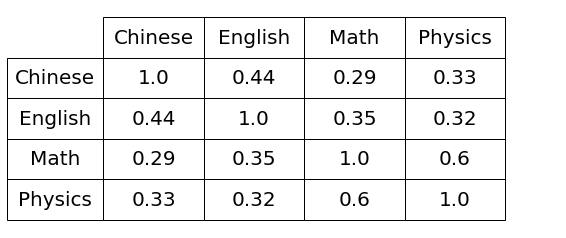

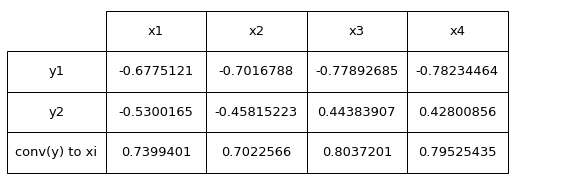

In [7]:
def Test():
    """
    函数功能： 验证算法正确性
    数据来源:  李航统计学习方法P314
    结论: 相差很小，可以认为算法正确
    """

    S = torch.FloatTensor(
        [
            [1,0.44,0.29,0.33],
            [0.44,1,0.35,0.32],
            [0.29,0.35,1,0.60],
            [0.33,0.32,0.60,1],
        ]
    )
    row = ["Chinese","English","Math","Physics"]
    col = ["Chinese","English","Math","Physics"]
    vals = np.array(S)
    plot_table(row, col, vals)

    lam, W = torch.eig(S, True)
    lam = lam[:, 0]
    print("特征值:")
    print(lam)
    print("方差贡献率:")
    print(lam/torch.sum(lam))
    k = 2
    #(4) 单位化， 并取
    M = torch.sqrt(torch.sum(W*W, 0)).unsqueeze(0)
    W = W / M
    top_k = torch.argsort(-lam)[:k]
    W = W[:,top_k]                           # (K, k)
    lam = lam[top_k]
    #(5) 计算相关系数
    R = torch.sqrt(lam).unsqueeze(1) * W.t()   #(k, K)

    #(6) 计算贡献率
    v =  torch.sum(W*W*lam.unsqueeze(0), 1)    #(K)

    print("单位特征向量:")
    print(W.t())
    
    row = ['y1','y2','conv(y) to xi']
    col = ['x1', 'x2', 'x3', 'x4']
    Data = np.array(torch.cat([R, v.unsqueeze(0)], 0))
    plot_table(row, col, Data)
    print("主成分的因子负荷量和贡献率:")

Test()

In [8]:
def load_data_for_area():
    """
    功能: 加载数据
    输入:无
    输出:
        X:Tensor, (K, N)          # 其中K为特征维度, N为样本数目
        id2Name:dict,             # 记录第i列特征表示的事物
    """
    
    """
    数据来源: http://setosa.io/ev/principal-component-analysis/
    数据解释: 此为英国4个地区平均每个人一周所吃食物的数量(17种)
    """
    X = torch.FloatTensor(
        [[ 375.,  135.,  458.,  475.],
        [  57.,   47.,   53.,   73.],
        [ 245.,  267.,  242.,  227.],
        [1472., 1494., 1462., 1582.],
        [ 105.,   66.,  103.,  103.],
        [  54.,   41.,   62.,   64.],
        [ 193.,  209.,  184.,  235.],
        [ 147.,   93.,  122.,  160.],
        [1102.,  674.,  957., 1137.],
        [ 720., 1033.,  566.,  874.],
        [ 253.,  143.,  171.,  265.],
        [ 685.,  586.,  750.,  803.],
        [ 488.,  355.,  418.,  570.],
        [ 198.,  187.,  220.,  203.],
        [ 360.,  334.,  337.,  365.],
        [1374., 1506., 1572., 1256.],
        [ 156.,  139.,  147.,  175.]]
    )
    id2Name = {0:"England",1:"N Ireland", 2:"Scotland", 3:"Wales"}
    return X, id2Name


In [60]:
def PCA_with_CM(X, k):
    """
    功能：使用协方差矩阵实现PCA算法
    输入:
        X: Tensor, (K,N)         # 数据矩阵
        k: int, (1)              # 目标维度
    输出:
        Y: Tensor, (k,N)         # 降维后数据
        R: Tensor, (k,K)         # Rij表示yi和xi的相关性
        v: Tensor, (K)           # vi表示所有选择的主成分对xi的贡献率
    """
    
    #(1) 归一化
    mean = torch.mean(X, 1).unsqueeze(1)  #(K, 1)
    var = torch.var(X, 1).unsqueeze(1)    #(K, 1)
    X = (X - mean) / torch.sqrt(var)
    
    
    #(2) 计算协方差矩阵
    S = X.matmul(X.t())                   #(K, K)
    
    #(3) 特征分解
    lam, W = torch.eig(S, True)
    lam = lam[:, 0]
    
    #(4) 单位化， 并取
    M = torch.sqrt(torch.sum(W*W, 0)).unsqueeze(0)
    W = W / M
    top_k = torch.argsort(-lam)[:k]
    W = W[:,top_k]                           # (K, k)
    lam = lam[top_k]
    
    #(5) 计算相关系数
    R = torch.sqrt(lam).unsqueeze(1) * W.t()   #(k, K)
    
    #(6) 计算贡献率
    s = torch.diag(S).unsqueeze(1)
    v =  torch.sum(W*W*lam.unsqueeze(0)/s, 1)                  #(K)
    
    #(7) 计算目标数据
    Y = W.t().matmul(X)
    
    return Y, R, v

In [68]:
def PCA_with_SVD(X, k):
    """
    功能：使用SVD分解实现PCA算法
    输入:
        X: Tensor, (K,N)         # 数据矩阵
        k: int, (1)              # 目标维度
    输出:
        Y: Tensor, (k,N)         # 降维后数据
        R: Tensor, (k,K)         # Rij表示yi和xi的相关性
        v: Tensor, (K)           # vi表示所有选择的主成分对xi的贡献率
    """
    #(1) 归一化
    mean = torch.mean(X, 1).unsqueeze(1)  #(K, 1)
    var = torch.var(X, 1).unsqueeze(1)    #(K, 1)
    X = (X - mean) / torch.sqrt(var)
    
    #(2) SVD分解
    U, Sigma, Vt = torch.svd(X, some=False)
    top_k = torch.argsort(-Sigma)[:k]
    
    #(3) 选择topk
    W = U[:,top_k]                           # (K, k)
    lam = Sigma[top_k] * Sigma[top_k]
    
    #(4) 计算相关系数
    R = torch.sqrt(lam).unsqueeze(1) * W.t()   #(k, K)
    
    #(5) 计算贡献率
    S = X.matmul(X.t())
    s = torch.diag(S).unsqueeze(1)
    v =  torch.sum(W*W*lam.unsqueeze(0)/s, 1)                  #(K)
    
    #(6) 计算目标数据
    Y = W.t().matmul(X)
    
    return Y, R, v

In [69]:
X, id2Name = load_data_for_area()

In [70]:
Y_u, R_u, v_u = PCA_with_CM(X, 2)

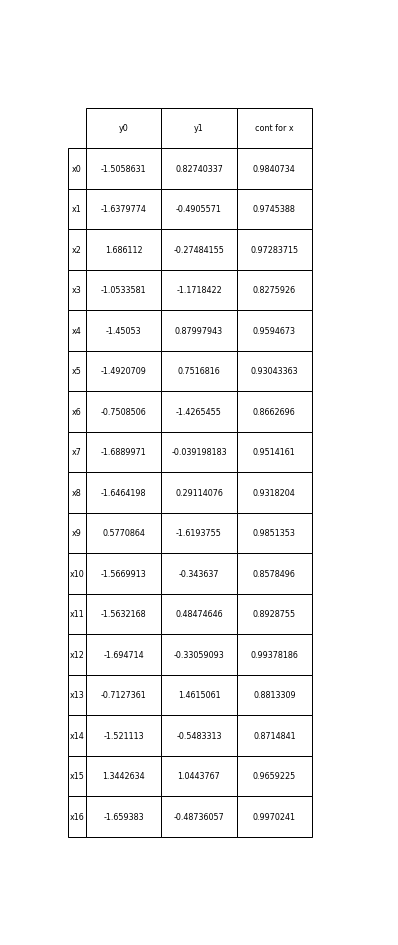

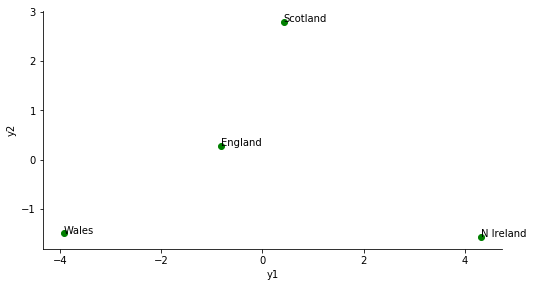

In [71]:
Y_svd, R_svd, v_svd = PCA_with_SVD(X, 2)
x_svd = np.array(Y_svd[0])
y_svd = np.array(Y_svd[1])
R_svd = torch.cat((R_svd, v_svd.unsqueeze(0)), 0)
plot_table(["x{}".format(i) for i in range(R_svd.size(1))], ["y{}".format(i) for i in range(R_svd.size(0)-1)] + ['cont for x'], np.array(R_svd.t()))
plot_two_dim(x_svd, y_svd, id2Name, 'y1', 'y2')


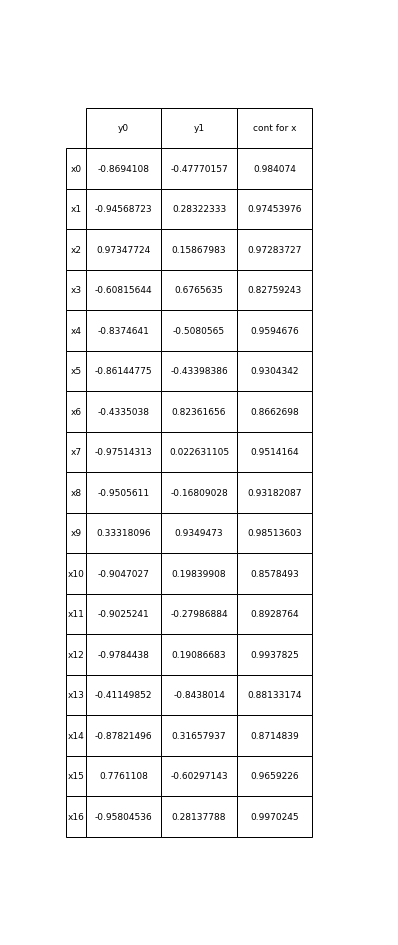

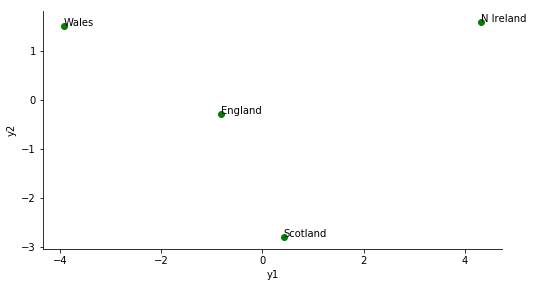

In [72]:
Y_u, R_u, v_u = PCA_with_CM(X, 2)
x_u = np.array(Y_u[0])
y_u = np.array(Y_u[1])

R_u = torch.cat((R_u, v_u.unsqueeze(0)), 0)
plot_table(["x{}".format(i) for i in range(R_u.size(1))], ["y{}".format(i) for i in range(R_u.size(0)-1)] + ['cont for x'], np.array(R_u.t()))
plot_two_dim(x_u, y_u, id2Name, 'y1', 'y2')